## Esame Metodi Numerici  10 gennaio 2025 - Ore 14

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **test.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzato il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 5**

Per il primo sistema lineare A x= b,  aggiungere una perturbazione dell' 1% sulla componente b[0]  del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria, richiamando il teorema relativo.
                                      **punti 3**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

 

In [5]:
from SolveTriangular import *
import matplotlib.pyplot as plt
import scipy as sp

In [6]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1) 
    F=np.triu(A, 1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    M=D + E
    N=-F 
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        xtilde=np.linalg.solve(M, N@x0 + b)
        xnew=(1 - omega) * xold + xtilde * omega
        errore=np.linalg.norm(xnew - xold) / np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

In [7]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1) 
    F=np.triu(A, 1)
    M=D + E
    N=-F 
    invM = np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it < it_max and errore >= toll:
        x = np.linalg.solve(M, N@x0 + b)
        errore=np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [8]:
def steepestdescent(A,b,x0,tol,itmax):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x) - b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore >= tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p) / (p.T@Ap)
        x = x + alpha * p
        vec_sol.append(x.copy())
        r= r + alpha * Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [9]:
def conjugate_gradient(A,b,x0,tol,itmax):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x) - b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it < itmax and errore >= tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha * p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha * Ap 
        gamma = (r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [15]:
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=sp.linalg.svd(A)  
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k = np.count_nonzero(s > thresh) # Il rango della matrice A
    d=U.T@b 
    d1=d[:k].reshape(k, 1)
    s1=s[:k].reshape(k, 1)
    c=d1 / s1
    x = V[:, :k]@c
    residuo = np.linalg.norm(d[k:n])**2
    return x,residuo

In [16]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('test_10_gennaio_2024')
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)
A1 = dati["A1"]
A1 = A1.astype(float)
b1 = dati["b1"]
b1 = b1.astype(float)

mA, nA = A.shape
mA1, nA1 = A1.shape
denseA = np.count_nonzero(A) / (mA * nA)
denseA1 = np.count_nonzero(A1) / (mA1 * nA1)
print("b shape:", b.shape)
print("Matrice A shape:", A.shape)
print("Matrice A densa?", denseA < 0.3)

eigA = np.linalg.eigvals(A)
print("A simmetrica?", np.all(A == A.T))
print("A definita positiva?", np.all(eigA > 0))
print("Indice di cond A:", np.linalg.cond(A))

print("Rango A1:",np.linalg.matrix_rank(A1))
print("b1 shape:", b1.shape)
print("Matrice A1 shape:", A1.shape)
print("Matrice A1 densa? ", denseA1 < 0.3)

b shape: (20, 1)
Matrice A shape: (20, 20)
Matrice A densa? True
A simmetrica? True
A definita positiva? True
Indice di cond A: 9999.999999998921
Rango A1: 13
b1 shape: (20, 1)
Matrice A1 shape: (20, 15)
Matrice A1 densa?  False


In [18]:
tol = 1e-12
itmax = 2000

In [19]:
x0 = np.zeros_like(b)

btilde = b.copy()
btilde[0] = btilde[0] + 0.01

xgc, itgc, err_vetgc = gauss_seidel(A, b, x0, tol, itmax)
xgcp, itgcp, err_vetgcp = gauss_seidel(A, btilde, x0, tol, itmax)

print(xgc)
print(itgc)

print(xgcp)
print(itgcp)

ex = np.linalg.norm(xgc - xgcp) / np.linalg.norm(xgc)
eb = np.linalg.norm(b - btilde) / np.linalg.norm(b)

print(ex)
print(eb)

condProb = np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)
print(condProb)

# Il problema risulta mal condizionato poiché é molto grande l'indice di condizionamento del problema, che nel caso in cui venga perturbato solo il termine noto,
# risulta ||A^-1|| * ||A||, quindi dipende dall'indice di condizionamento della matrice, che è mal condizionata

raggio spettrale Gauss-Seidel  0.9964399151691916
raggio spettrale Gauss-Seidel  0.9964399151691916
[[1.        ]
 [1.        ]
 [1.00000038]
 [1.        ]
 [1.        ]
 [1.00198475]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99919941]]
2000
[[6.42046352]
 [1.        ]
 [1.00000038]
 [1.        ]
 [1.        ]
 [1.00198475]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.56402248]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99919941]]
2000
1.2158945673084547
0.00738285977523615
16110.038437492956


In [21]:
x, r = SVDLS(A1, b1)

print(x)

[[0.5210993 ]
 [1.25827182]
 [1.27889527]
 [0.46087355]
 [0.89024294]
 [1.04762977]
 [0.29616227]
 [0.59585228]
 [1.13383321]
 [0.94430646]
 [1.32127485]
 [0.97301581]
 [0.15568769]
 [0.79644108]
 [1.09968922]]



- Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8,0,1],[0,12,2],[1,2,-14.0]])
b3= np.array([9.0, 14.0,  -11.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3 con  **punti[3]**.

Totale **Punti 12**

In [26]:
A3=np.array([[8,0,1],[0,12,2],[1,2,-14.0]])
b3= np.array([9.0, 14.0, -11.0]).reshape(3, 1)
x0_3 = np.zeros_like(b3)

eigA3 = np.linalg.eigvals(A3)
print("A3 simmetrica?", np.all(A3 == A3.T))
print("A3 definita positiva?", np.all(eigA3 > 0))
print("Indice di cond A3:", np.linalg.cond(A3))

# Il teorema garantisce che il teorema di gauss seidel converge se la matrice del sistema lineare A è simmetrica e definita positiva
# In questo caso è simmetrica ma non definita positiva, quindi non converge per questa matrice

x3, it3, errv3 = gauss_seidel(A3, b3, x0_3, tol, itmax)

print(x3)

A3 simmetrica? True
A3 definita positiva? False
Indice di cond A3: 1.7651462497889765
raggio spettrale Gauss-Seidel  0.03273809523809523
[[1.]
 [1.]
 [1.]]


# Esercizio 2

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 
                                       **[4 punti]**
                                                         

In [202]:
def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1:n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])
    p = num / den

    return p

def interpL(x, y, xv):
    n = x.size
    m = xv.size
    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xv)

    pol = L@y
    return pol

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$,
facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75 e si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;
                                          **[2 punti]**

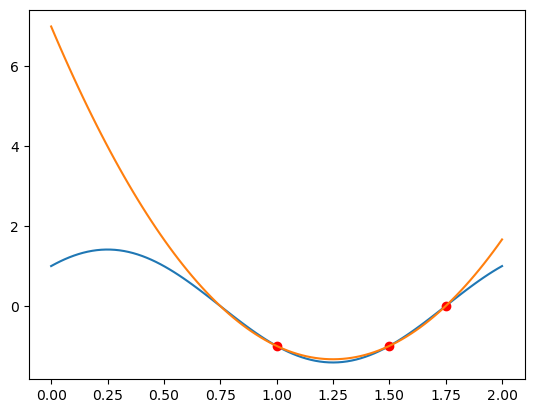

In [238]:
f = lambda x: np.cos(np.pi * x) + np.sin(np.pi * x)
xx = np.linspace(0, 2, 100)

x = np.array([1.0, 1.5, 1.75])

pol = InterpL(x, f(x), xx)
plt.plot(xx, f(xx), x, f(x), 'ro', xx, pol)
plt.show()

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula 
                                                             **[3 punti]**

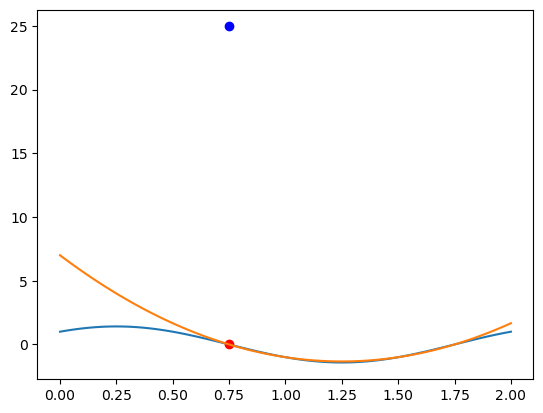

24.9505152535425


In [253]:
x_ = 0.75
x2 = np.append(x_, x.copy())
polres = np.polyval(np.flip(pol_), x_)
e = np.abs(f(x_) - polres)
plt.plot(xx, f(xx), x_, f(x_), 'ro', xx, pol, x_, polres, 'bo')
plt.show()

print(e)

si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.   **[1 punto]**

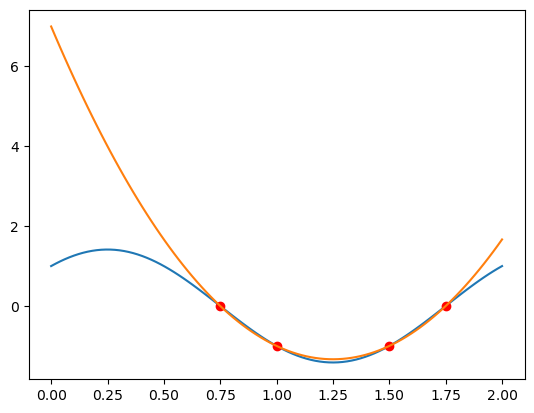

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [269]:
x2 = np.append(x_, x.copy())
pol2 = InterpL(x, f(x), xx)
plt.plot(xx, f(xx), x2, f(x2), 'ro', xx, pol2)
plt.show()

print(np.any(pol > 0.74 and pol < 0.76))

Si calcoli la costante di Lebesgue per il problema di interpolazione in esame  e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale
                               **[3 punti]**

In [247]:
n = x.size
L = np.zeros((100, 1))
for i in range(n):
    p = plagr(x, i)
    L = L + np.abs(np.polyval(p, xx))
cost_leb = np.max(L) # Equivale all'indice di condizionamento del problema dell'interpolazione polinomiale
print(cost_leb)

29.0


Totale **Punti 13**

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**Risolvere un problema mediante Machine Learning significa**:
- Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina le esatte istruzioni per risolvere il problema
edizione

**2  A cosa serve il validation set?**

-  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Una classica rete CNN è solitamente composta da:**

· Layer convolutivi seguiti da layer di pooling, flatten layer e neuroni completamente connessi

· Layer di pooling seguiti da layer convolutivi, flatten layer e neuroni completamente connessi

· Layer convolutivi seguiti da layer di pooling, flatten layer e softmax

· Layer di pooling seguiti da layer convolutivi, flatten layer e softmax

**4 Il livello softmax**
- Trasforma i digits della rete in probabilità
- Trasforma le probabilità della rete in digits
- Normalizza i valori di input della rete
- È indispensabile nel task di regressione
lla rete

**5 Per una rete neurale, l’apprendimento è legato a:**
- 	Minimizzare la funzione obiettivo
- Minimizzare la funzione di attivazione
- 	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation
- Massimizzare il valore della funzione di training


**Domande Aperte**

**6. Spiega in modo dettagliato come il learning rate influenza la convergenza di una rete neurale durante il training. Quali sono le conseguenze di un learning rate troppo alto o troppo basso nel training di una rete neurale. Descrivi le principali strategie di  aggiornamentodel  learning rate durante il training di una rete neurale.** [punti 1.5]

**7. Descrivi in dettaglio l'algoritmo di discesa del gradiente con momento. Quali sono le motivazioni che hanno portato alla sua introduzione rispetto alla discesa del gradiente standard? Fornisci la formula matematica dell'aggiornamento dei pesi in questo algoritmo e spiega il ruolo del termine di momento** [punti 3]